In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset, specifying the encoding
movies = pd.read_csv("/content/IMDb Movies India.csv", encoding='latin1') # or 'ISO-8859-1'

In [ ]:
print(movies.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [ ]:
# Features: 'genre', 'director', 'actors' | Target: 'rating'
X = movies[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = movies['Rating']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def combine_features(row):
    # Access each column individually and concatenate the values
    return f"{row['Genre']} {row['Director']} {row['Actor 1']} {row['Actor 2']} {row['Actor 3']}"

X_train['combined_features'] = X_train.apply(combine_features, axis=1)
X_test['combined_features'] = X_test.apply(combine_features, axis=1)

In [ ]:
X_train = X_train.drop(['Genre', 'Director', 'Actor 1','Actor 2','Actor 3'], axis=1)
X_test = X_test.drop(['Genre', 'Director', 'Actor 1','Actor 2','Actor 3'], axis=1)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', tfidf_vectorizer, 'combined_features')
    ])

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
# y_train is already a NumPy array, so no need to call .values
y_train = imputer.fit_transform(y_train.reshape(-1, 1))  # Reshape for SimpleImputer
y_train = y_train.ravel()  # Flatten back to original shape




In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('tfidf',
                                                  TfidfVectorizer(max_features=100,
                                                                  stop_words='english'),
                                                  'combined_features')])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:

# Build the pipeline for TF-IDF and Random Forest
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42))])

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
# Assuming 'y_test' is a Pandas Series or DataFrame
y_test = y_test.fillna(y_test.mean())

# Replace NaNs in y_pred with the mean
y_pred = np.nan_to_num(y_pred)

#Now proceed with calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score (R2): {r2}")

Mean Absolute Error (MAE): 0.6048292243988745
Root Mean Squared Error (RMSE): 0.9512712030575718
R-squared Score (R2): 0.05928206284476101


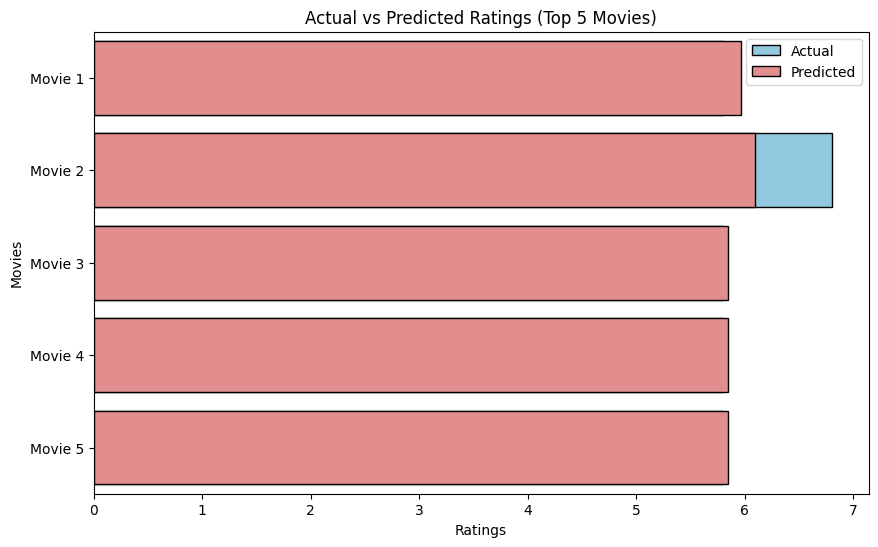

In [ ]:
# Horizontal bar plot with color gradient
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df['Actual Rating'], y=results_df.index, color='skyblue', label='Actual', edgecolor='black')
sns.barplot(x=results_df['Predicted Rating'], y=results_df.index, color='lightcoral', label='Predicted', edgecolor='black')

# Adding labels and title
plt.title('Actual vs Predicted Ratings (Top 5 Movies)')
plt.xlabel('Ratings')
plt.ylabel('Movies')

# Add legend
plt.legend()

plt.show()


<Figure size 1000x600 with 0 Axes>

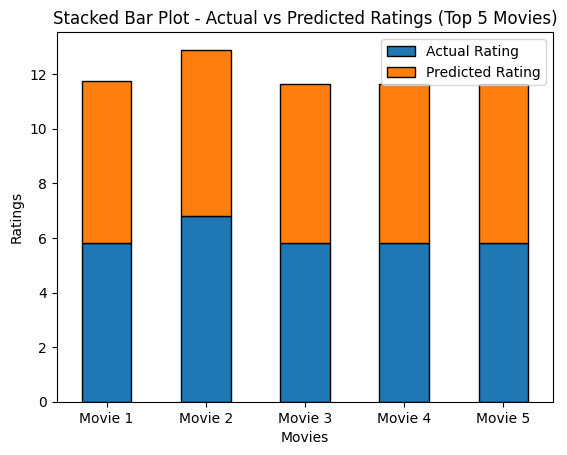

In [ ]:
# Stacked bar plot
plt.figure(figsize=(10, 6))
results_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')

# Adding labels and title
plt.title('Stacked Bar Plot - Actual vs Predicted Ratings (Top 5 Movies)')
plt.xlabel('Movies')
plt.ylabel('Ratings')
plt.xticks(rotation=0)

# Show plot
plt.show()


<ipython-input-54-e3414736a55d>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot([i, i], [results_df['Actual Rating'][i], results_df['Predicted Rating'][i]], color='gray', linestyle='--')


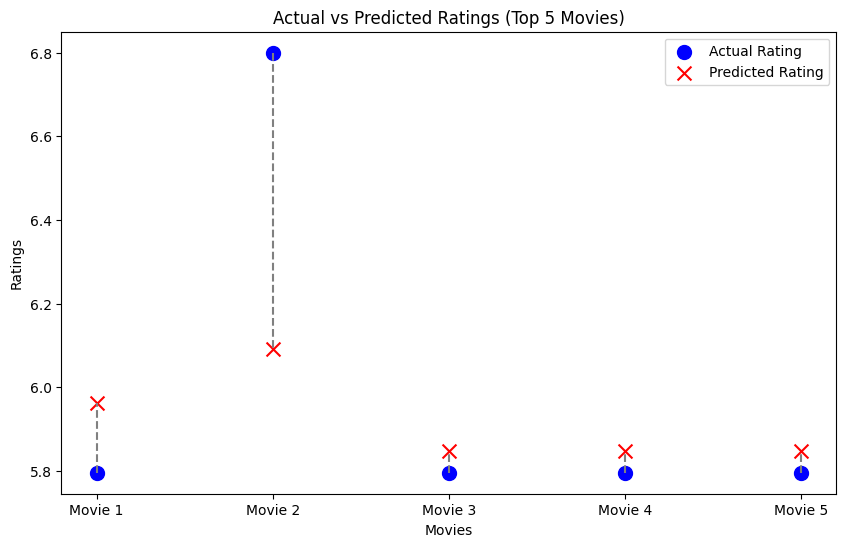

In [ ]:
# Scatter plot with connecting lines
plt.figure(figsize=(10, 6))
plt.scatter(results_df.index, results_df['Actual Rating'], color='blue', label='Actual Rating', s=100, marker='o')
plt.scatter(results_df.index, results_df['Predicted Rating'], color='red', label='Predicted Rating', s=100, marker='x')

# Adding lines to connect actual vs predicted
for i in range(len(results_df)):
    plt.plot([i, i], [results_df['Actual Rating'][i], results_df['Predicted Rating'][i]], color='gray', linestyle='--')

# Adding labels and title
plt.title('Actual vs Predicted Ratings (Top 5 Movies)')
plt.xlabel('Movies')
plt.ylabel('Ratings')

# Add legend
plt.legend()

plt.show()


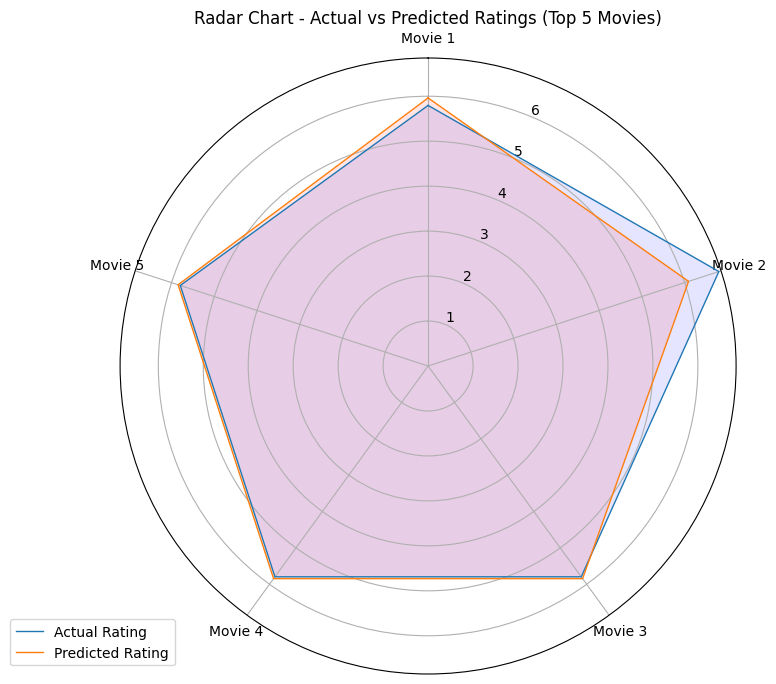

In [ ]:
# Radar chart
from math import pi

# Number of variables we're plotting (movies)
categories = list(results_df.index)
N = len(categories)

# Radar chart setup
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Append the first value to close the radar chart circle
actual_values = results_df['Actual Rating'].tolist()
predicted_values = results_df['Predicted Rating'].tolist()
actual_values += actual_values[:1]
predicted_values += predicted_values[:1]

plt.figure(figsize=(8, 8))

# Plot radar chart for actual ratings
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw one axis per movie
plt.xticks(angles[:-1], categories)

# Plot data and fill area for actual ratings
ax.plot(angles, actual_values, linewidth=1, linestyle='solid', label='Actual Rating')
ax.fill(angles, actual_values, 'b', alpha=0.1)

# Plot data and fill area for predicted ratings
ax.plot(angles, predicted_values, linewidth=1, linestyle='solid', label='Predicted Rating')
ax.fill(angles, predicted_values, 'r', alpha=0.1)

# Adding title
plt.title('Radar Chart - Actual vs Predicted Ratings (Top 5 Movies)')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


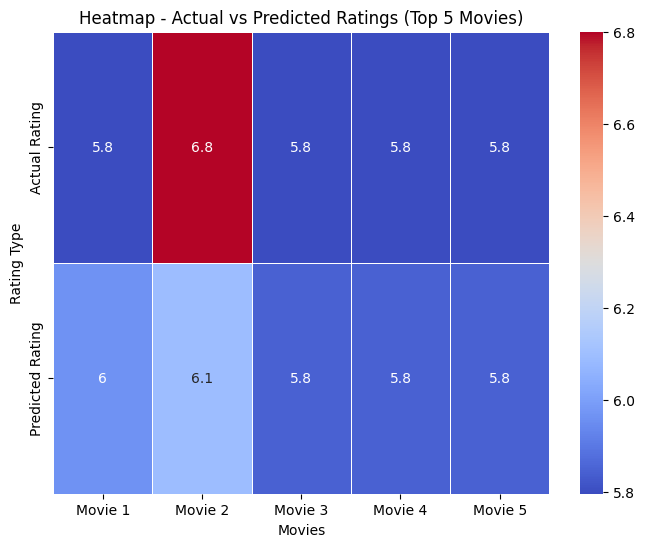

In [ ]:
# Heatmap for actual vs predicted ratings
plt.figure(figsize=(8, 6))

# Create a new DataFrame for heatmap visualization
heatmap_df = results_df.T  # Transpose the dataframe for better heatmap structure

# Draw the heatmap
sns.heatmap(heatmap_df, annot=True, cmap="coolwarm", linewidths=0.5)

# Add labels and title
plt.title('Heatmap - Actual vs Predicted Ratings (Top 5 Movies)')
plt.xlabel('Movies')
plt.ylabel('Rating Type')

plt.show()
